## 0. 重新放行本机 root 到 X server
### PS: 在宿主机终端执行（每次登录图形会话后都要再执行一次）：

```bash
echo $DISPLAY                  
xhost +local:root            
```


## 1. 在运行 `raw.plot()` 或 `Brain()` 前执行 `%gui qt` 启动 Qt 事件循环

In [1]:
%gui qt


## 2. 测试2D弹窗

In [2]:
import mne
mne.viz.set_browser_backend('qt')
mne.viz.set_3d_backend('pyvistaqt')
mne.set_config('MNE_DATA', '/workspace/shared/mne_data', set_env=True)




Using qt as 2D backend.
Using pyvistaqt 3d backend.



In [3]:
from mne.datasets import sample
from pathlib import Path

data_path = Path(sample.data_path())
print(data_path)


/workspace/shared/mne_data/MNE-sample-data


In [4]:
raw_path = data_path / "MEG" / "sample" / "sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(raw_path, preload=True)
raw.plot(n_channels=10, duration=5.0)


Opening raw data file /workspace/shared/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


## 3. 测试3D

In [5]:
subjects_dir = Path("/workspace/shared/mne_subjects")
subject = "fsaverage"

brain = mne.viz.Brain(
    subject=subject,
    hemi='split',
    surf='inflated',
    subjects_dir=str(subjects_dir),
    background='white'
)


## 4. 改用notebook内嵌显示绘图

Opening raw data file /workspace/shared/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


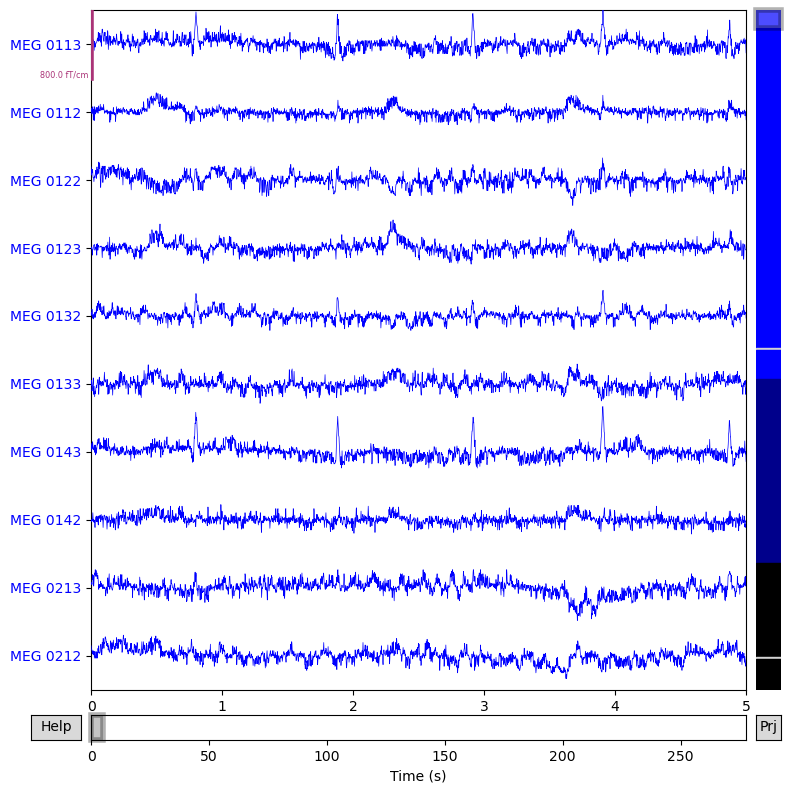

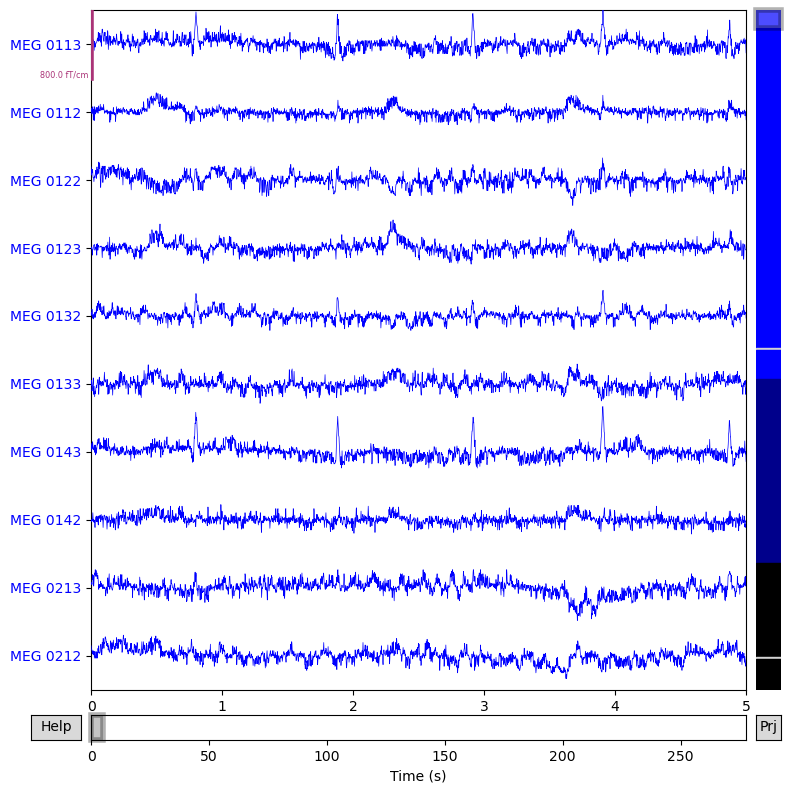

In [3]:
import mne
mne.viz.set_browser_backend('matplotlib')  # 2D 内嵌图
mne.viz.set_3d_backend('pyvistaqt')        # 3D 窗口或截图模式

from mne.datasets import sample
from pathlib import Path
data_path = Path(sample.data_path())
raw = mne.io.read_raw_fif(data_path / "MEG" / "sample" / "sample_audvis_raw.fif", preload=True)
raw.plot(n_channels=10, duration=5.0)


In [10]:
# Authors: Britta Westner <britta.wstnr@gmail.com>
#          Eric Larson <larson.eric.d@gmail.com>
#
# License: BSD-3-Clause
# Copyright the MNE-Python contributors.

import matplotlib.pyplot as plt

import mne
from mne.beamformer import apply_lcmv, make_lcmv
from mne.datasets import fetch_fsaverage, sample

Opening raw data file /workspace/shared/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Removing projector <Projection | Average EEG reference, active : False, n_channels : 60>
Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : 

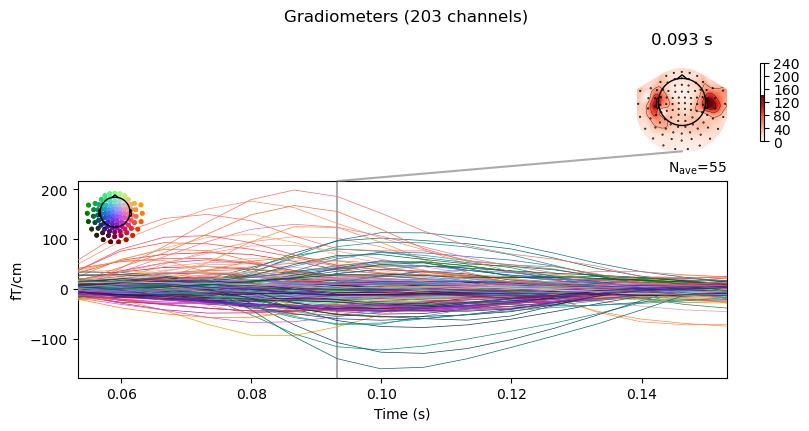

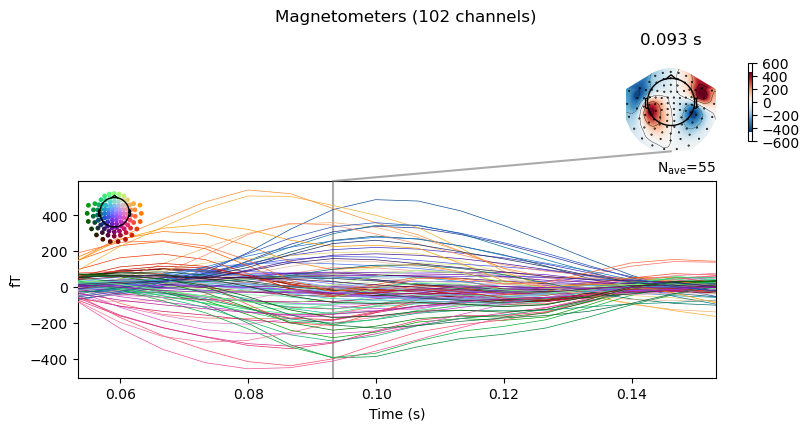

In [6]:
# data_path = sample.data_path()
# subjects_dir = data_path / "subjects"
meg_path = data_path / "MEG" / "sample"
raw_fname = meg_path / "sample_audvis_filt-0-40_raw.fif"

# Read the raw data
raw = mne.io.read_raw_fif(raw_fname)
raw.info["bads"] = ["MEG 2443"]  # bad MEG channel

# Set up epoching
event_id = 1  # those are the trials with left-ear auditory stimuli
tmin, tmax = -0.2, 0.5
events = mne.find_events(raw)

# pick relevant channels
raw.pick(["meg", "eog"])  # pick channels of interest

# Create epochs
proj = False  # already applied
epochs = mne.Epochs(
    raw,
    events,
    event_id,
    tmin,
    tmax,
    baseline=(None, 0),
    preload=True,
    proj=proj,
    reject=dict(grad=4000e-13, mag=4e-12, eog=150e-6),
)

# for speed purposes, cut to a window of interest
evoked = epochs.average().crop(0.05, 0.15)

# Visualize averaged sensor space data
evoked.plot_joint()

del raw  # save memory

Computing rank from data with rank=None
    Using tolerance 4.1e-09 (2.2e-16 eps * 305 dim * 6.1e+04  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Created an SSP operator (subspace dimension = 3)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 305 -> 302
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2035
[done]
Computing rank from data with rank=None
    Using tolerance 2.8e-09 (2.2e-16 eps * 305 dim * 4.2e+04  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Created an SSP operator (subspace dimension = 3)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 305 -> 302
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 1705
[done]
Computing rank from covariance with rank=None
    Using tolerance 4e-14 (2.2e-16 eps * 102 dim *

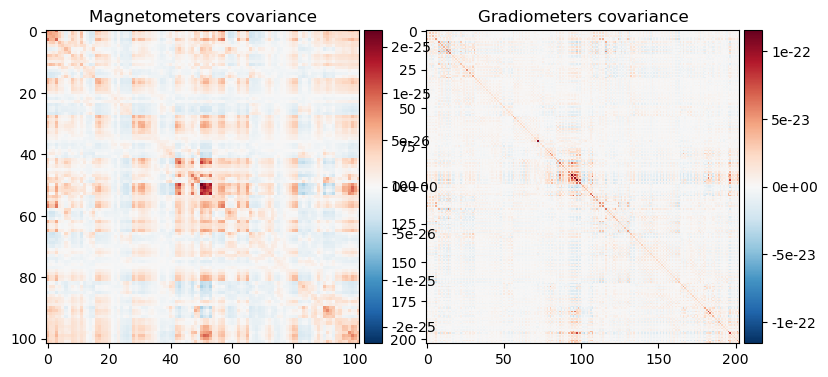

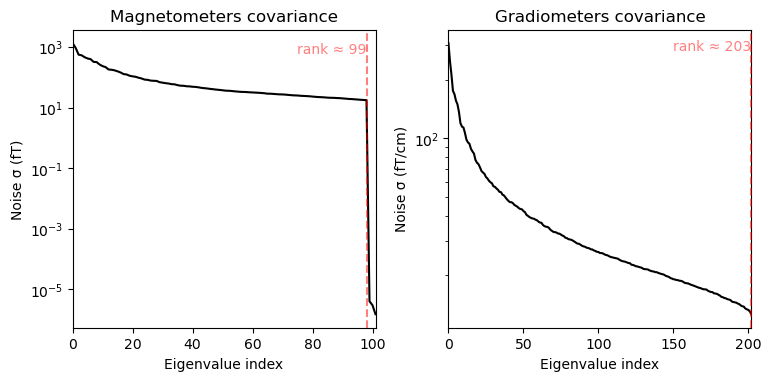

In [7]:
data_cov = mne.compute_covariance(epochs, tmin=0.01, tmax=0.25, method="empirical")
noise_cov = mne.compute_covariance(epochs, tmin=tmin, tmax=0, method="empirical")
data_cov.plot(epochs.info)
del epochs

In [8]:
# Read forward model

fwd_fname = meg_path / "sample_audvis-meg-vol-7-fwd.fif"
forward = mne.read_forward_solution(fwd_fname)

Reading forward solution from /workspace/shared/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-vol-7-fwd.fif...
    Reading a source space...
    [done]
    1 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (3757 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [11]:
filters = make_lcmv(
    evoked.info,
    forward,
    data_cov,
    reg=0.05,
    noise_cov=noise_cov,
    pick_ori="max-power",
    weight_norm="unit-noise-gain",
    rank=None,
)

# You can save the filter for later use with:
# filters.save('filters-lcmv.h5')

Computing rank from covariance with rank=None
    Using tolerance 7.1e-13 (2.2e-16 eps * 305 dim * 10  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.9e-13 (2.2e-16 eps * 305 dim * 4.3  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Making LCMV beamformer with rank {'meg': 302}
Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank={'meg': 302}
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 3757 sources
Filter computation complete


In [14]:
filters_vec = make_lcmv(
    evoked.info,
    forward,
    data_cov,
    reg=0.05,
    noise_cov=noise_cov,
    pick_ori="vector",
    weight_norm="unit-noise-gain-invariant",
    rank=None,
)
# save a bit of memory
src = forward["src"]
del forward

Computing rank from covariance with rank=None
    Using tolerance 7.1e-13 (2.2e-16 eps * 305 dim * 10  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.9e-13 (2.2e-16 eps * 305 dim * 4.3  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Making LCMV beamformer with rank {'meg': 302}
Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank={'meg': 302}
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 3757 sources
Filter computation complete


In [15]:
stc = apply_lcmv(evoked, filters)
stc_vec = apply_lcmv(evoked, filters_vec)
del filters, filters_vec

In [20]:
lims = [0.3, 0.45, 0.6]
kwargs = dict(
    src=src,
    subject=subject,
    subjects_dir=subjects_dir,
    initial_time=0.087,
    verbose=True,
)

In [23]:
stc.plot(mode="stat_map", clim=dict(kind="value", pos_lims=lims), **kwargs)


ValueError: scipy.sparse does not support dtype float32. The only supported types are: bool, int8, uint8, int16, uint16, int32, uint32, int64, uint64, longlong, ulonglong, float32, float64, longdouble, complex64, complex128, clongdouble.

In [18]:
stc.plot(mode="glass_brain", clim=dict(kind="value", lims=lims), **kwargs)

ValueError: scipy.sparse does not support dtype float32. The only supported types are: bool, int8, uint8, int16, uint16, int32, uint32, int64, uint64, longlong, ulonglong, float32, float64, longdouble, complex64, complex128, clongdouble.

In [21]:
brain = stc_vec.plot_3d(
    clim=dict(kind="value", lims=lims),
    hemi="both",
    size=(600, 600),
    views=["sagittal"],
    # Could do this for a 3-panel figure:
    # view_layout='horizontal', views=['coronal', 'sagittal', 'axial'],
    brain_kwargs=dict(silhouette=True),
    **kwargs,
)

ValueError: class subject attribute ('sample') did not match input subject (fsaverage)

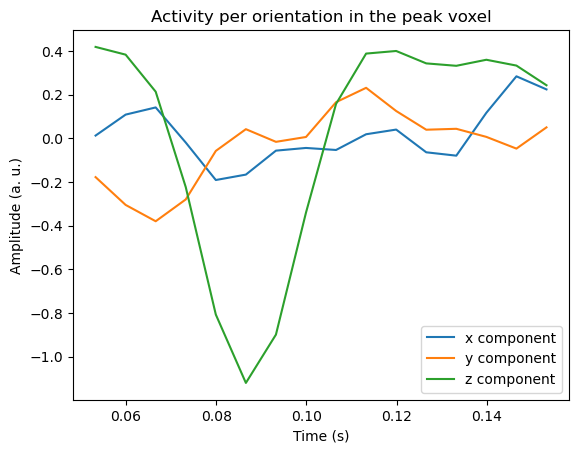

In [24]:
peak_vox, _ = stc_vec.get_peak(tmin=0.08, tmax=0.1, vert_as_index=True)

ori_labels = ["x", "y", "z"]
fig, ax = plt.subplots(1)
for ori, label in zip(stc_vec.data[peak_vox, :, :], ori_labels):
    ax.plot(stc_vec.times, ori, label=f"{label} component")
ax.legend(loc="lower right")
ax.set(
    title="Activity per orientation in the peak voxel",
    xlabel="Time (s)",
    ylabel="Amplitude (a. u.)",
)
mne.viz.utils.plt_show()
del stc_vec

In [25]:
fetch_fsaverage(subjects_dir)  # ensure fsaverage src exists
fname_fs_src = subjects_dir / "fsaverage" / "bem" / "fsaverage-vol-5-src.fif"

src_fs = mne.read_source_spaces(fname_fs_src)
morph = mne.compute_source_morph(
    src,
    subject_from="sample",
    src_to=src_fs,
    subjects_dir=subjects_dir,
    niter_sdr=[5, 5, 2],
    niter_affine=[5, 5, 2],
    zooms=7,  # just for speed
    verbose=True,
)
stc_fs = morph.apply(stc)
del stc

stc_fs.plot(
    src=src_fs,
    mode="stat_map",
    initial_time=0.085,
    subjects_dir=subjects_dir,
    clim=dict(kind="value", pos_lims=lims),
    verbose=True,
)

0 files missing from root.txt in /workspace/shared/mne_subjects
0 files missing from bem.txt in /workspace/shared/mne_subjects/fsaverage
    Reading a source space...
    [done]
    1 source spaces read


ValueError: scipy.sparse does not support dtype float32. The only supported types are: bool, int8, uint8, int16, uint16, int32, uint32, int64, uint64, longlong, ulonglong, float32, float64, longdouble, complex64, complex128, clongdouble.